In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
date_table=pd.read_csv(r'C:\Users\Bhavya\Downloads\RPC12_Input_For_Participants\RPC12_Input_For_Participants\datasets\dim_date.csv')

In [3]:
date_table.head()

,date,fiscal_year,quarter
0,01-Apr-21,2022,Q1
1,01-May-21,2022,Q1
2,01-Jun-21,2022,Q1
3,01-Jul-21,2022,Q2
4,01-Aug-21,2022,Q2


In [4]:
date_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   date         36 non-null     object
 1   fiscal_year  36 non-null     int64 
 2   quarter      36 non-null     object
dtypes: int64(1), object(2)
memory usage: 996.0+ bytes


In [5]:
date_table['date']=pd.to_datetime(date_table['date'])

C:\Users\Bhavya\AppData\Local\Temp\ipykernel_5980\1303472307.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  date_table['date']=pd.to_datetime(date_table['date'])


In [6]:
makers_table=pd.read_csv(r"C:\Users\Bhavya\Downloads\RPC12_Input_For_Participants\RPC12_Input_For_Participants\datasets\electric_vehicle_sales_by_makers.csv")

In [7]:
makers_table.head()

,date,vehicle_category,maker,electric_vehicles_sold
0,01-Apr-21,2-Wheelers,OLA ELECTRIC,0
1,01-Apr-22,2-Wheelers,OKAYA EV,0
2,01-May-21,2-Wheelers,OLA ELECTRIC,0
3,01-Jun-21,2-Wheelers,OLA ELECTRIC,0
4,01-Jul-21,2-Wheelers,OLA ELECTRIC,0


In [8]:
makers_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   date                    816 non-null    object
 1   vehicle_category        816 non-null    object
 2   maker                   816 non-null    object
 3   electric_vehicles_sold  816 non-null    int64 
dtypes: int64(1), object(3)
memory usage: 25.6+ KB


In [9]:
makers_table['date']=pd.to_datetime(makers_table['date'])

C:\Users\Bhavya\AppData\Local\Temp\ipykernel_5980\2766530919.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  makers_table['date']=pd.to_datetime(makers_table['date'])


In [10]:
makers_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   date                    816 non-null    datetime64[ns]
 1   vehicle_category        816 non-null    object        
 2   maker                   816 non-null    object        
 3   electric_vehicles_sold  816 non-null    int64         
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 25.6+ KB


In [11]:
state_table=pd.read_csv(r"C:\Users\Bhavya\Downloads\RPC12_Input_For_Participants\RPC12_Input_For_Participants\datasets\electric_vehicle_sales_by_state.csv")

In [12]:
state_table.head()

,date,state,vehicle_category,electric_vehicles_sold,total_vehicles_sold
0,01-Apr-21,Sikkim,2-Wheelers,0,398
1,01-Apr-21,Sikkim,4-Wheelers,0,361
2,01-May-21,Sikkim,2-Wheelers,0,113
3,01-May-21,Sikkim,4-Wheelers,0,98
4,01-Jun-21,Sikkim,2-Wheelers,0,229


In [13]:
state_table['date']=pd.to_datetime(state_table['date'])

C:\Users\Bhavya\AppData\Local\Temp\ipykernel_5980\3437061545.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  state_table['date']=pd.to_datetime(state_table['date'])


In [14]:
data1=pd.merge(date_table,makers_table,on='date',how='inner')

In [15]:
data1.head()

,date,fiscal_year,quarter,vehicle_category,maker,electric_vehicles_sold
0,2021-04-01,2022,Q1,2-Wheelers,OLA ELECTRIC,0
1,2021-04-01,2022,Q1,4-Wheelers,BYD India,0
2,2021-04-01,2022,Q1,4-Wheelers,PCA Automobiles,0
3,2021-04-01,2022,Q1,4-Wheelers,BMW India,0
4,2021-04-01,2022,Q1,4-Wheelers,Volvo Auto India,0


In [16]:
####. List the top 3 and bottom 3 makers for the fiscal years 2023 and 2024 in  terms of the number of 2-wheelers sold.
 
fil_data=data1[data1['fiscal_year'].isin([2023,2024])]
grp_data=fil_data[(fil_data['vehicle_category']=='2-Wheelers')]
summ_data=grp_data.groupby(['maker','fiscal_year'])['electric_vehicles_sold'].sum().reset_index()
sorted_data=summ_data.sort_values(by=['electric_vehicles_sold'],ascending=False)
sorted_data

,maker,fiscal_year,electric_vehicles_sold
18,OLA ELECTRIC,2024,322489
25,TVS,2024,180743
17,OLA ELECTRIC,2023,152583
3,ATHER,2024,107552
5,BAJAJ,2024,105695
15,OKINAWA,2023,96945
9,HERO ELECTRIC,2023,88993
0,AMPERE,2023,87376
24,TVS,2023,82093
20,OTHERS,2024,78660


In [17]:
def fx(df,year):
    df_year=df[df['fiscal_year']==year]
    top3_makers=df_year.nlargest(3,'electric_vehicles_sold')
    bottom3_makers=df_year.nsmallest(3,'electric_vehicles_sold')
    return top3_makers,bottom3_makers
top3_makers_2023,bottom3_makers_2023=fx(sorted_data,2023)
top3_makers_2024,bottom3_makers_2024=fx(sorted_data,2024)
    

In [18]:
print("Top 3 Makers in fiscal year 2023")
print(top3_makers_2023)

Top 3 Makers in fiscal year 2023
            maker  fiscal_year  electric_vehicles_sold
17   OLA ELECTRIC         2023                  152583
15        OKINAWA         2023                   96945
9   HERO ELECTRIC         2023                   88993


In [19]:
print("Top 3 Makers in fiscal year 2024")
print(top3_makers_2024)

Top 3 Makers in fiscal year 2024
           maker  fiscal_year  electric_vehicles_sold
18  OLA ELECTRIC         2024                  322489
25           TVS         2024                  180743
3          ATHER         2024                  107552


In [20]:
print("Bottom 3 Makers in fiscal year 2023")
print(bottom3_makers_2023)

Bottom 3 Makers in fiscal year 2023
       maker  fiscal_year  electric_vehicles_sold
11  JITENDRA         2023                    8563
7      BEING         2023                   11018
21   PURE EV         2023                   11556


In [21]:
print("Bottom 3 Makers in fiscal year 2024")
print(bottom3_makers_2024)

Bottom 3 Makers in fiscal year 2024
              maker  fiscal_year  electric_vehicles_sold
6   BATTRE ELECTRIC         2024                    4841
23           REVOLT         2024                    7254
12    KINETIC GREEN         2024                    9585


AttributeError: 'numpy.int64' object has no attribute 'startswith'

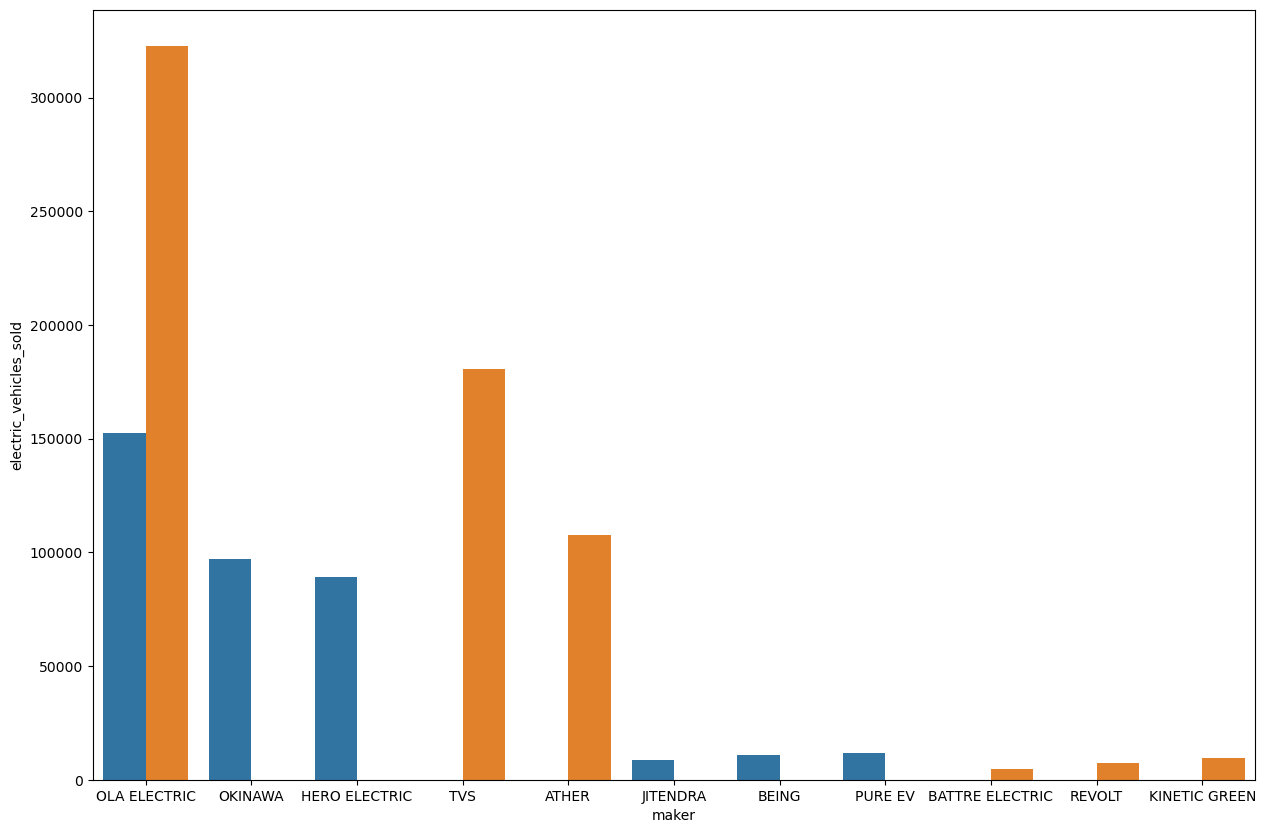

In [22]:
combined_data=pd.concat([top3_makers_2023,top3_makers_2024,bottom3_makers_2023,bottom3_makers_2024])
combined_data
plt.figure(figsize=(15,10))
sns.barplot(x='maker',y='electric_vehicles_sold',hue='fiscal_year',data=combined_data)
plt.xlabel('Maker')
plt.ylabel('Number of 2-Wheelers Sold')
plt.show()

In [23]:
### Total  2 wheeler electric vehicles sold  in FY 2023
data1[(data1.vehicle_category=='2-Wheelers')&(data1.fiscal_year==2023)]['electric_vehicles_sold'].sum()

727903

In [24]:
data2=pd.merge(state_table,date_table,on='date',how='inner')

In [25]:
data2.head()

,date,state,vehicle_category,electric_vehicles_sold,total_vehicles_sold,fiscal_year,quarter
0,2021-04-01,Sikkim,2-Wheelers,0,398,2022,Q1
1,2021-04-01,Sikkim,4-Wheelers,0,361,2022,Q1
2,2021-04-01,Andaman & Nicobar Island,2-Wheelers,0,515,2022,Q1
3,2021-04-01,Arunachal Pradesh,2-Wheelers,0,1256,2022,Q1
4,2021-04-01,Arunachal Pradesh,4-Wheelers,0,724,2022,Q1


In [26]:
##Identify the top 5 states with the highest penetration rate in 2-wheeler and 4-wheeler EV sales in FY 2024.
data_2024=data2[data2['fiscal_year']==2024]
data_2024_2wh=data_2024[data_2024['vehicle_category']=='2-Wheelers']
data_2024_2wh['penetration_2w_rate']=data_2024_2wh['electric_vehicles_sold']/data_2024_2wh['total_vehicles_sold']*100
data_2024_2w_state=data_2024_2wh.groupby('state')['penetration_2w_rate'].mean().reset_index()
data_2024_2w_state_sort=data_2024_2w_state.sort_values(by='penetration_2w_rate',ascending=False).head(5)
data_2024_2w_state_sort

C:\Users\Bhavya\AppData\Local\Temp\ipykernel_5980\1910961788.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2024_2wh['penetration_2w_rate']=data_2024_2wh['electric_vehicles_sold']/data_2024_2wh['total_vehicles_sold']*100


,state,penetration_2w_rate
10,Goa,18.184784
17,Kerala,13.610393
16,Karnataka,11.510878
20,Maharashtra,10.157240
9,Delhi,9.700033


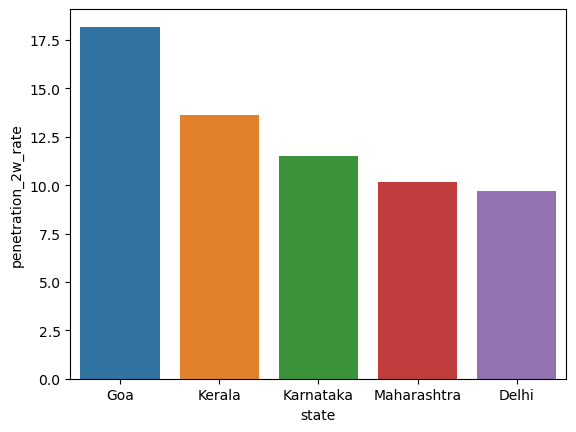

<Figure size 1000x500 with 0 Axes>

In [29]:
sns.barplot(x='state',y='penetration_2w_rate',data=data_2024_2w_state_sort)
plt.figure(figsize=(10,5))
plt.show()

In [30]:
data_2024=data2[data2['fiscal_year']==2024]
data_2024_4wh=data_2024[data_2024['vehicle_category']=='4-Wheelers']
data_2024_4wh['penetration_4w_rate']=data_2024_4wh['electric_vehicles_sold']/data_2024_4wh['total_vehicles_sold']*100
data_2024_4w_state=data_2024_4wh.groupby('state')['penetration_4w_rate'].mean().reset_index()
data_2024_4w_state_sort=data_2024_4w_state.sort_values(by='penetration_4w_rate',ascending=False).head(5)
data_2024_4w_state_sort

C:\Users\Bhavya\AppData\Local\Temp\ipykernel_5980\2198776749.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2024_4wh['penetration_4w_rate']=data_2024_4wh['electric_vehicles_sold']/data_2024_4wh['total_vehicles_sold']*100


,state,penetration_4w_rate
17,Kerala,42.309117
6,Chandigarh,4.914759
10,Goa,4.369512
16,Karnataka,4.277313
9,Delhi,4.263585


<Figure size 1000x500 with 0 Axes>

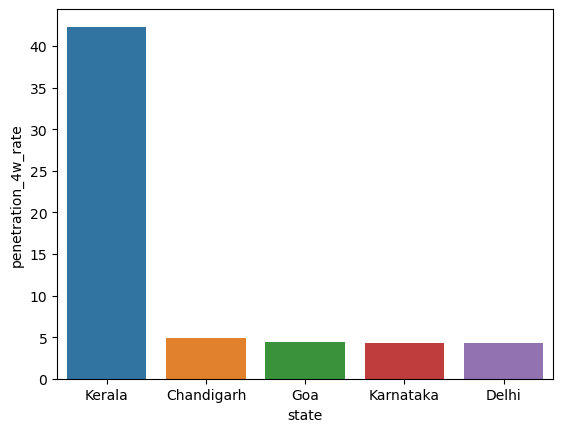

<Figure size 1000x500 with 0 Axes>

In [31]:
sns.barplot(x='state',y='penetration_4w_rate',data=data_2024_4w_state_sort)
plt.figure(figsize=(10,5))

In [32]:
####How do the EV sales and penetration rates in Delhi compare to Karnataka for 2024?
fil_data1=data2[data2['fiscal_year']==2024]
state_level_data=fil_data1[fil_data1['state'] .isin(['Delhi','Karnataka'])]
state_level_total=state_level_data.groupby('state').agg({'electric_vehicles_sold':'sum','total_vehicles_sold':'sum'}).reset_index()
state_level_total




,state,electric_vehicles_sold,total_vehicles_sold
0,Delhi,46724,606348
1,Karnataka,160989,1581988


In [33]:
state_level_total['penetration_rate']=state_level_total['electric_vehicles_sold']/state_level_total['total_vehicles_sold']*100
print(state_level_total[['state','electric_vehicles_sold','total_vehicles_sold','penetration_rate']])

       state  electric_vehicles_sold  total_vehicles_sold  penetration_rate
0      Delhi                   46724               606348          7.705806
1  Karnataka                  160989              1581988         10.176373


In [34]:
####List the states with negative penetration (decline) in EV sales from 2022 to 2024?
year_2022=data2[data2['fiscal_year']==2022]
year_2022['penetration_2022']=year_2022['electric_vehicles_sold']/year_2022['total_vehicles_sold']*100
year_2022_state=year_2022.groupby('state')['penetration_2022'].mean().reset_index()



C:\Users\Bhavya\AppData\Local\Temp\ipykernel_5980\2563347893.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  year_2022['penetration_2022']=year_2022['electric_vehicles_sold']/year_2022['total_vehicles_sold']*100


In [35]:
year_2024=data2[data2['fiscal_year']==2024]
year_2024['penetration_2024']=year_2024['electric_vehicles_sold']/year_2024['total_vehicles_sold']*100
year_2024_state=year_2024.groupby('state')['penetration_2024'].mean().reset_index()


compare_penetration=pd.merge(year_2022_state[['state','penetration_2022']],year_2024_state[['state','penetration_2024']],on='state',how='inner')
compare_penetration

compare_penetration['change_penetration']=compare_penetration['penetration_2024']-compare_penetration['penetration_2022']
negative_penetration=compare_penetration[compare_penetration['change_penetration']<0]
negative_penetration



C:\Users\Bhavya\AppData\Local\Temp\ipykernel_5980\3096093974.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  year_2024['penetration_2024']=year_2024['electric_vehicles_sold']/year_2024['total_vehicles_sold']*100


,state,penetration_2022,penetration_2024,change_penetration
0,Andaman & Nicobar Island,0.648338,0.592370,-0.055968
17,Ladakh,2.638889,2.014572,-0.624317


In [36]:
###electric vehicles sold in 2024 indifferent states

year_fil_data=data2[data2['fiscal_year']==2024]
ev_2024=year_fil_data.groupby('state').agg({'electric_vehicles_sold':'sum'}).reset_index()
ev_2024

,state,electric_vehicles_sold
0,Andaman & Nicobar,2
1,Andaman & Nicobar Island,33
2,Andhra Pradesh,33183
3,Arunachal Pradesh,31
4,Assam,3497
5,Bihar,15069
6,Chandigarh,2877
7,Chhattisgarh,28540
8,DNH and DD,198
9,Delhi,46724


In [37]:
data2.loc[data2['fiscal_year']==2022]

,date,state,vehicle_category,electric_vehicles_sold,total_vehicles_sold,fiscal_year,quarter
0,2021-04-01,Sikkim,2-Wheelers,0,398,2022,Q1
1,2021-04-01,Sikkim,4-Wheelers,0,361,2022,Q1
2,2021-04-01,Andaman & Nicobar Island,2-Wheelers,0,515,2022,Q1
3,2021-04-01,Arunachal Pradesh,2-Wheelers,0,1256,2022,Q1
4,2021-04-01,Arunachal Pradesh,4-Wheelers,0,724,2022,Q1
...,...,...,...,...,...,...,...
810,2022-03-01,Tamil Nadu,2-Wheelers,7708,124272,2022,Q4
811,2022-03-01,Tripura,2-Wheelers,18,3504,2022,Q4
812,2022-03-01,Uttar Pradesh,2-Wheelers,1986,180927,2022,Q4
813,2022-03-01,Uttarakhand,2-Wheelers,435,11692,2022,Q4


In [38]:
data2.loc[data2['fiscal_year']==2024]

,date,state,vehicle_category,electric_vehicles_sold,total_vehicles_sold,fiscal_year,quarter
1631,2023-04-01,Sikkim,2-Wheelers,0,465,2024,Q1
1632,2023-04-01,Sikkim,4-Wheelers,0,439,2024,Q1
1633,2023-04-01,Andaman & Nicobar Island,2-Wheelers,0,325,2024,Q1
1634,2023-04-01,Arunachal Pradesh,2-Wheelers,0,971,2024,Q1
1635,2023-04-01,Ladakh,2-Wheelers,0,43,2024,Q1
...,...,...,...,...,...,...,...
2440,2024-03-01,Mizoram,2-Wheelers,58,1932,2024,Q4
2441,2024-03-01,DNH and DD,2-Wheelers,25,780,2024,Q4
2442,2024-03-01,Manipur,2-Wheelers,13,1394,2024,Q4
2443,2024-03-01,Andaman & Nicobar Island,2-Wheelers,2,447,2024,Q4


In [39]:
data1

,date,fiscal_year,quarter,vehicle_category,maker,electric_vehicles_sold
0,2021-04-01,2022,Q1,2-Wheelers,OLA ELECTRIC,0
1,2021-04-01,2022,Q1,4-Wheelers,BYD India,0
2,2021-04-01,2022,Q1,4-Wheelers,PCA Automobiles,0
3,2021-04-01,2022,Q1,4-Wheelers,BMW India,0
4,2021-04-01,2022,Q1,4-Wheelers,Volvo Auto India,0
...,...,...,...,...,...,...
811,2024-03-01,2024,Q4,2-Wheelers,BGAUSS,3070
812,2024-03-01,2024,Q4,2-Wheelers,BATTRE ELECTRIC,625
813,2024-03-01,2024,Q4,2-Wheelers,KINETIC GREEN,3915
814,2024-03-01,2024,Q4,2-Wheelers,REVOLT,585


In [40]:
####What are the quarterly trends based on sales volume for the top 5 EV makers (4-wheelers) from 2022 to 2024?
data_yr_4wh=data1[(data1['fiscal_year'].isin([2022,2023,2024]))&(data1['vehicle_category']=='4-Wheelers')]

data_yr_4w_ev_sold=data_yr_4wh.groupby('maker')['electric_vehicles_sold'].sum().reset_index()
top5_maker=data_yr_4w_ev_sold.sort_values(by=['electric_vehicles_sold'],ascending=True).head(5)
top5_maker





,maker,electric_vehicles_sold
6,Mercedes -Benz AG,388
3,KIA Motors,557
9,Volvo Auto India,568
0,BMW India,1370
7,PCA Automobiles,1684


In [41]:
data_2024=data1[data1['fiscal_year'].isin([2022,2023,2024])]
data_2024_4w=data_2024[data_2024['vehicle_category']=='4-Wheelers']
data_2024_4w.groupby(['fiscal_year','maker','quarter'])['electric_vehicles_sold'].sum().reset_index().sort_values(['electric_vehicles_sold'],ascending=False).head(10)

,fiscal_year,maker,quarter,electric_vehicles_sold
115,2024,Tata Motors,Q4,17361
114,2024,Tata Motors,Q3,13236
100,2024,Mahindra & Mahindra,Q1,10911
113,2024,Tata Motors,Q2,10337
75,2023,Tata Motors,Q4,9528
112,2024,Tata Motors,Q1,7247
74,2023,Tata Motors,Q3,6651
73,2023,Tata Motors,Q2,6192
101,2024,Mahindra & Mahindra,Q2,5855
35,2022,Tata Motors,Q4,5834


In [42]:
#####6. List down the compounded annual growth rate (CAGR) in 4-wheeler units for the top 5 makers from 2022 to 2024.

data_4wh=data1[data1['vehicle_category']=='4-Wheelers']
sales_2022=data_4wh[data_4wh['fiscal_year']==2022].groupby('maker')['electric_vehicles_sold'].sum().reset_index()
sales_2024=data_4wh[data_4wh['fiscal_year']==2024].groupby('maker')['electric_vehicles_sold'].sum().reset_index()

In [43]:
sales_2022

,maker,electric_vehicles_sold
0,BMW India,7
1,BYD India,33
2,Hyundai Motor,110
3,KIA Motors,0
4,MG Motor,1647
5,Mahindra & Mahindra,4042
6,Mercedes -Benz AG,26
7,PCA Automobiles,0
8,Tata Motors,12708
9,Volvo Auto India,4


In [44]:
sales_2024

,maker,electric_vehicles_sold
0,BMW India,1078
1,BYD India,1466
2,Hyundai Motor,1390
3,KIA Motors,328
4,MG Motor,8829
5,Mahindra & Mahindra,23346
6,Mercedes -Benz AG,291
7,PCA Automobiles,1533
8,Tata Motors,48181
9,Volvo Auto India,459


In [45]:
sales_data=pd.merge(sales_2022,sales_2024,on='maker')


In [46]:
sales_data['CAGR']=(sales_data['electric_vehicles_sold_y']/sales_data['electric_vehicles_sold_x'])**1/2-1
top5_makers=sales_data.nlargest(5,'electric_vehicles_sold_y')
print(top5_makers[['maker','electric_vehicles_sold_x','electric_vehicles_sold_y','CAGR']])

                 maker  electric_vehicles_sold_x  electric_vehicles_sold_y  \
8          Tata Motors                     12708                     48181   
5  Mahindra & Mahindra                      4042                     23346   
4             MG Motor                      1647                      8829   
7      PCA Automobiles                         0                      1533   
1            BYD India                        33                      1466   

        CAGR  
8   0.895696  
5   1.887927  
4   1.680328  
7        inf  
1  21.212121  


In [47]:
####7. List down the top 10 states that had the highest compounded annual growth rate (CAGR) from 2022 to 2024 in total vehicles sold.

sales_2022=data2[data2['fiscal_year']==2022].groupby('state')['total_vehicles_sold'].sum().reset_index()
sales_2024=data2[data2['fiscal_year']==2024].groupby('state')['total_vehicles_sold'].sum().reset_index()
sales_data=pd.merge(sales_2022,sales_2024,on='state')
sales_data['CAGR']=((sales_data['total_vehicles_sold_y']/sales_data['total_vehicles_sold_x'])**(1/2))-1
top10_states=sales_data.nlargest(10,'total_vehicles_sold_y')
print(top10_states[['state','total_vehicles_sold_x','total_vehicles_sold_y','CAGR']])

             state  total_vehicles_sold_x  total_vehicles_sold_y      CAGR
31   Uttar Pradesh                2497288                2932347  0.083611
19     Maharashtra                1667002                2293994  0.173081
29      Tamil Nadu                1345017                1716940  0.129831
10         Gujarat                1094872                1590987  0.205457
15       Karnataka                1007894                1581988  0.252836
27       Rajasthan                 880985                1300476  0.214974
18  Madhya Pradesh                 967179                1286182  0.153182
4            Bihar                 892873                1132703  0.126324
33     West Bengal                 860709                 961909  0.057155
1   Andhra Pradesh                 772748                 782865  0.006525


In [48]:
####What are the peak and low season months for EV sales based on the data from 2022 to 2024?
data1['Month']=data1['date'].dt.month

In [49]:
data1

,date,fiscal_year,quarter,vehicle_category,maker,electric_vehicles_sold,Month
0,2021-04-01,2022,Q1,2-Wheelers,OLA ELECTRIC,0,4
1,2021-04-01,2022,Q1,4-Wheelers,BYD India,0,4
2,2021-04-01,2022,Q1,4-Wheelers,PCA Automobiles,0,4
3,2021-04-01,2022,Q1,4-Wheelers,BMW India,0,4
4,2021-04-01,2022,Q1,4-Wheelers,Volvo Auto India,0,4
...,...,...,...,...,...,...,...
811,2024-03-01,2024,Q4,2-Wheelers,BGAUSS,3070,3
812,2024-03-01,2024,Q4,2-Wheelers,BATTRE ELECTRIC,625,3
813,2024-03-01,2024,Q4,2-Wheelers,KINETIC GREEN,3915,3
814,2024-03-01,2024,Q4,2-Wheelers,REVOLT,585,3


In [50]:
ev_sales=data1.groupby('Month')['electric_vehicles_sold'].sum().reset_index().sort_values(by='electric_vehicles_sold',ascending=False)
ev_sales.loc[ev_sales['electric_vehicles_sold'].idxmax()]

Month                          3
electric_vehicles_sold    291587
Name: 2, dtype: int64

In [51]:
ev_sales.loc[ev_sales['electric_vehicles_sold'].idxmin()]

Month                          6
electric_vehicles_sold    106709
Name: 5, dtype: int64

In [52]:
####9. What is the projected number of EV sales (including 2-wheelers and 4- wheelers) for the top 10 states by penetration rate in 2030,
####based on the compounded annual growth rate (CAGR) from previous years?

yr_2024=data2[data2['fiscal_year']==2024].groupby('state')['electric_vehicles_sold'].sum().reset_index()

In [53]:
yr_2022=data2[data2['fiscal_year']==2022].groupby('state')['electric_vehicles_sold'].sum().reset_index()

In [54]:
compare_data=pd.merge(yr_2022,yr_2024,on='state',suffixes=('_2022','_2024'))
compare_data                                                            

,state,electric_vehicles_sold_2022,electric_vehicles_sold_2024
0,Andaman & Nicobar Island,22,33
1,Andhra Pradesh,13928,33183
2,Arunachal Pradesh,0,31
3,Assam,730,3497
4,Bihar,4829,15069
5,Chandigarh,411,2877
6,Chhattisgarh,4534,28540
7,DNH and DD,35,198
8,Delhi,16535,46724
9,Goa,1778,10799


In [55]:
compare_data['cagr']=((compare_data['electric_vehicles_sold_2024']/compare_data['electric_vehicles_sold_2022'])**(1/2))-1
top10_states=compare_data.nlargest(10,'cagr')
top10_states

,state,electric_vehicles_sold_2022,electric_vehicles_sold_2024,cagr
2,Arunachal Pradesh,0,31,inf
22,Mizoram,0,275,inf
21,Meghalaya,4,133,4.766281
30,Tripura,28,304,2.295018
23,Nagaland,1,9,2.000000
5,Chandigarh,411,2877,1.645751
6,Chhattisgarh,4534,28540,1.508917
33,West Bengal,2685,16864,1.506156
9,Goa,1778,10799,1.464483
7,DNH and DD,35,198,1.378475


In [56]:
#### Projected 2030 sales based on 2024 cagr
# Projected Sales in 2030=Sales in 2024×(1+CAGR)n
##n=6 (no of years from 2024 to 2030)
top10_states['Projected_sales_2030']=top10_states['electric_vehicles_sold_2024']*(1+top10_states['cagr'])**6
top10_states['Projected_sales_2030']
print(top10_states[['state','electric_vehicles_sold_2024','cagr','Projected_sales_2030']])

                state  electric_vehicles_sold_2024      cagr  \
2   Arunachal Pradesh                           31       inf   
22            Mizoram                          275       inf   
21          Meghalaya                          133  4.766281   
30            Tripura                          304  2.295018   
23           Nagaland                            9  2.000000   
5          Chandigarh                         2877  1.645751   
6        Chhattisgarh                        28540  1.508917   
33        West Bengal                        16864  1.506156   
9                 Goa                        10799  1.464483   
7          DNH and DD                          198  1.378475   

    Projected_sales_2030  
2                    inf  
22                   inf  
21          4.889074e+06  
30          3.890633e+05  
23          6.561000e+03  
5           9.868110e+05  
6           7.118219e+06  
33          4.178395e+06  
9           2.419574e+06  
7           3.584731e+04 

In [58]:
###10. Estimate the revenue growth rate of 4-wheeler and 2-wheelers
####EVs in India for 2022 vs 2024 and 2023 vs 2024, assuming an average
###unit price. H

sales_2wh_2022=data1[(data1['fiscal_year']==2022)&(data1['vehicle_category']=='2-Wheelers')]['electric_vehicles_sold'].sum()
sales_2wh_2023=data1[(data1['fiscal_year']==2023)&(data1['vehicle_category']=='2-Wheelers')]['electric_vehicles_sold'].sum()
sales_2wh_2024=data1[(data1['fiscal_year']==2024)&(data1['vehicle_category']=='2-Wheelers')]['electric_vehicles_sold'].sum()

sales_4wh_2022=data1[(data1['fiscal_year']==2022)&(data1['vehicle_category']=='4-Wheelers')]['electric_vehicles_sold'].sum()
sales_4wh_2023=data1[(data1['fiscal_year']==2023)&(data1['vehicle_category']=='4-Wheelers')]['electric_vehicles_sold'].sum()
sales_4wh_2024=data1[(data1['fiscal_year']==2024)&(data1['vehicle_category']=='4-Wheelers')]['electric_vehicles_sold'].sum()


In [59]:
avg_price_2w=85000
avg_price_4w=1500000

revenue_2wh_2022=avg_price_2w*sales_2wh_2022
revenue_2wh_2023=avg_price_2w*sales_2wh_2023
revenue_2wh_2024=avg_price_2w*sales_2wh_2024
revenue_4wh_2022=avg_price_4w*sales_4wh_2022
revenue_4wh_2023=avg_price_4w*sales_4wh_2023
revenue_4wh_2024=avg_price_4w*sales_4wh_2024

In [60]:
growth_2w_2022_2024=(revenue_2wh_2024-revenue_2wh_2022)/revenue_2wh_2022*100
growth_4w_2022_2024=(revenue_4wh_2024-revenue_4wh_2022)/revenue_4wh_2022*100

growth_2w_2023_2024=(revenue_2wh_2024-revenue_2wh_2023)/revenue_2wh_2023*100
growth_4w_2023_2024=(revenue_4wh_2024-revenue_4wh_2023)/revenue_4wh_2022*100

In [61]:
print(f'growth_2w_2022_2024:{growth_2w_2022_2024:.2f}%')
print(f'growth_4w_2022_2024:{growth_4w_2022_2024:.2f}%')
print(f'growth_2w_2023_2024:{growth_2w_2023_2024:.2f}%')
print(f'growth_4w_2023_2024:{growth_4w_2023_2024:.2f}%')

growth_2w_2022_2024:269.28%
growth_4w_2022_2024:367.79%
growth_2w_2023_2024:28.13%
growth_4w_2023_2024:212.28%
